### Dataset Donwload Link: https://www.kaggle.com/uciml/pima-indians-diabetes-database/download 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df['Pregnancies'].median()

3.0

In [8]:
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,148,72,35,0,33.6
1,1,85,66,29,0,26.6
2,8,183,64,0,0,23.3
3,1,89,66,23,94,28.1
4,0,137,40,35,168,43.1
...,...,...,...,...,...,...
763,10,101,76,48,180,32.9
764,2,122,70,27,0,36.8
765,5,121,72,23,112,26.2
766,1,126,60,0,0,30.1


In [9]:
# Replacing 0 with NAN

newdf = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
newdf.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [10]:
# Cheking null values

newdf.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [11]:
# Handling NaN with median values

df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
# Converting Ages into Categories 1 2 and 3

df.loc[(df['Age'] > 20) & (df['Age'] <= 41), 'Age'] = 1
df.loc[(df['Age'] > 41) & (df['Age'] <= 61), 'Age'] = 2
df.loc[(df['Age'] > 61) & (df['Age'] <= 81), 'Age'] = 3

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,2,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,1


## Model

In [13]:
X = df.loc[:,df.columns != 'Outcome']
y = df.loc[:,df.columns == "Outcome"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)

/home/shreesh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [16]:
pred = model.predict(X_test)

In [17]:
score = model.score(X_test, y_test)
print("Accuracy : ",score*100)
cf = metrics.confusion_matrix(y_test, pred)
cf

Accuracy :  73.59307359307358


array([[133,  24],
       [ 37,  37]])

/home/shreesh/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


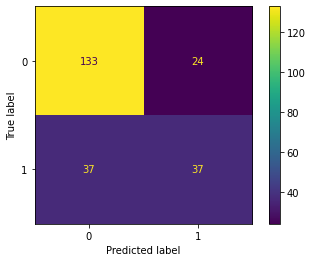

In [18]:
metrics.plot_confusion_matrix(model, X_test, y_test)